In [96]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print("NumPy", np.__version__)
import scipy.stats
import sympy

NumPy 1.14.0


In [135]:
def simulation(N=10000000, u=1e-6, s=0.05, H=2.0, repetitions=1000):
     
    N = np.uint64(N)

    w = np.array([[1, 1-s, 1-s, 1+s*H]])
    
    E = np.array(
                [[(1-u)**2,(1-u)*u, (1-u)*u,  u**2],
                [(1-u)*u, (1-u)**2, u**2,  (1-u)*u],
                [(1-u)*u, u**2,(1-u)**2,   (1-u)*u],
                [u**2, (1-u)*u, (1-u)*u,(1-u)**2 ]]
                )
    
    # rows are genotypes, cols are repretitions
    n = np.zeros((4, repetitions))
    n[0,:] = N
    t=0
    T = np.zeros(repetitions) #time
    D=[] 
    update = np.array([True] * repetitions)
    # Generations until first appearance of AB
    while update.any():
        T[update] += 1
        X=n/N
        D.append(X)
        X_m = E @ X # frequencies after mutation
        X_s = (w.reshape(4,1)*X_m )/(w @ X_m)
        for j in update.nonzero()[0]:
            # random genetic drift
            n[:,j] = np.random.multinomial(N, X_s[:,j])
        update = (X[-1,:]<=0)
        T_1 =np.copy(T)
        
    update = np.array([True] * repetitions)
    # Generations until extinction/fixation with respect for AB
    while update.any():
        T[update] +=1 
        X=n/N
        D.append(X)
        X_m = E @ X # frequencies after mutation
        X_s = (w.reshape(4,1)*X_m )/(w @ X_m)
        for j in update.nonzero()[0]:
            # random genetic drift
            n[:,j] = np.random.multinomial(N, X_s[:,j])
        update = (X[-1,:]<1-1e-5)&(X[-1,:]>0)
        
    return T, T_1,np.array(D)
        
        
time,first_double,frequencies = simulation()


In [136]:
mask = (frequencies[-1,3,:] == 0)
extinctions = frequencies[:,:,mask==True]
fixations =frequencies[:,:,mask==False]
extinction_time = time[mask==True]
fixation_time = time[mask==False]

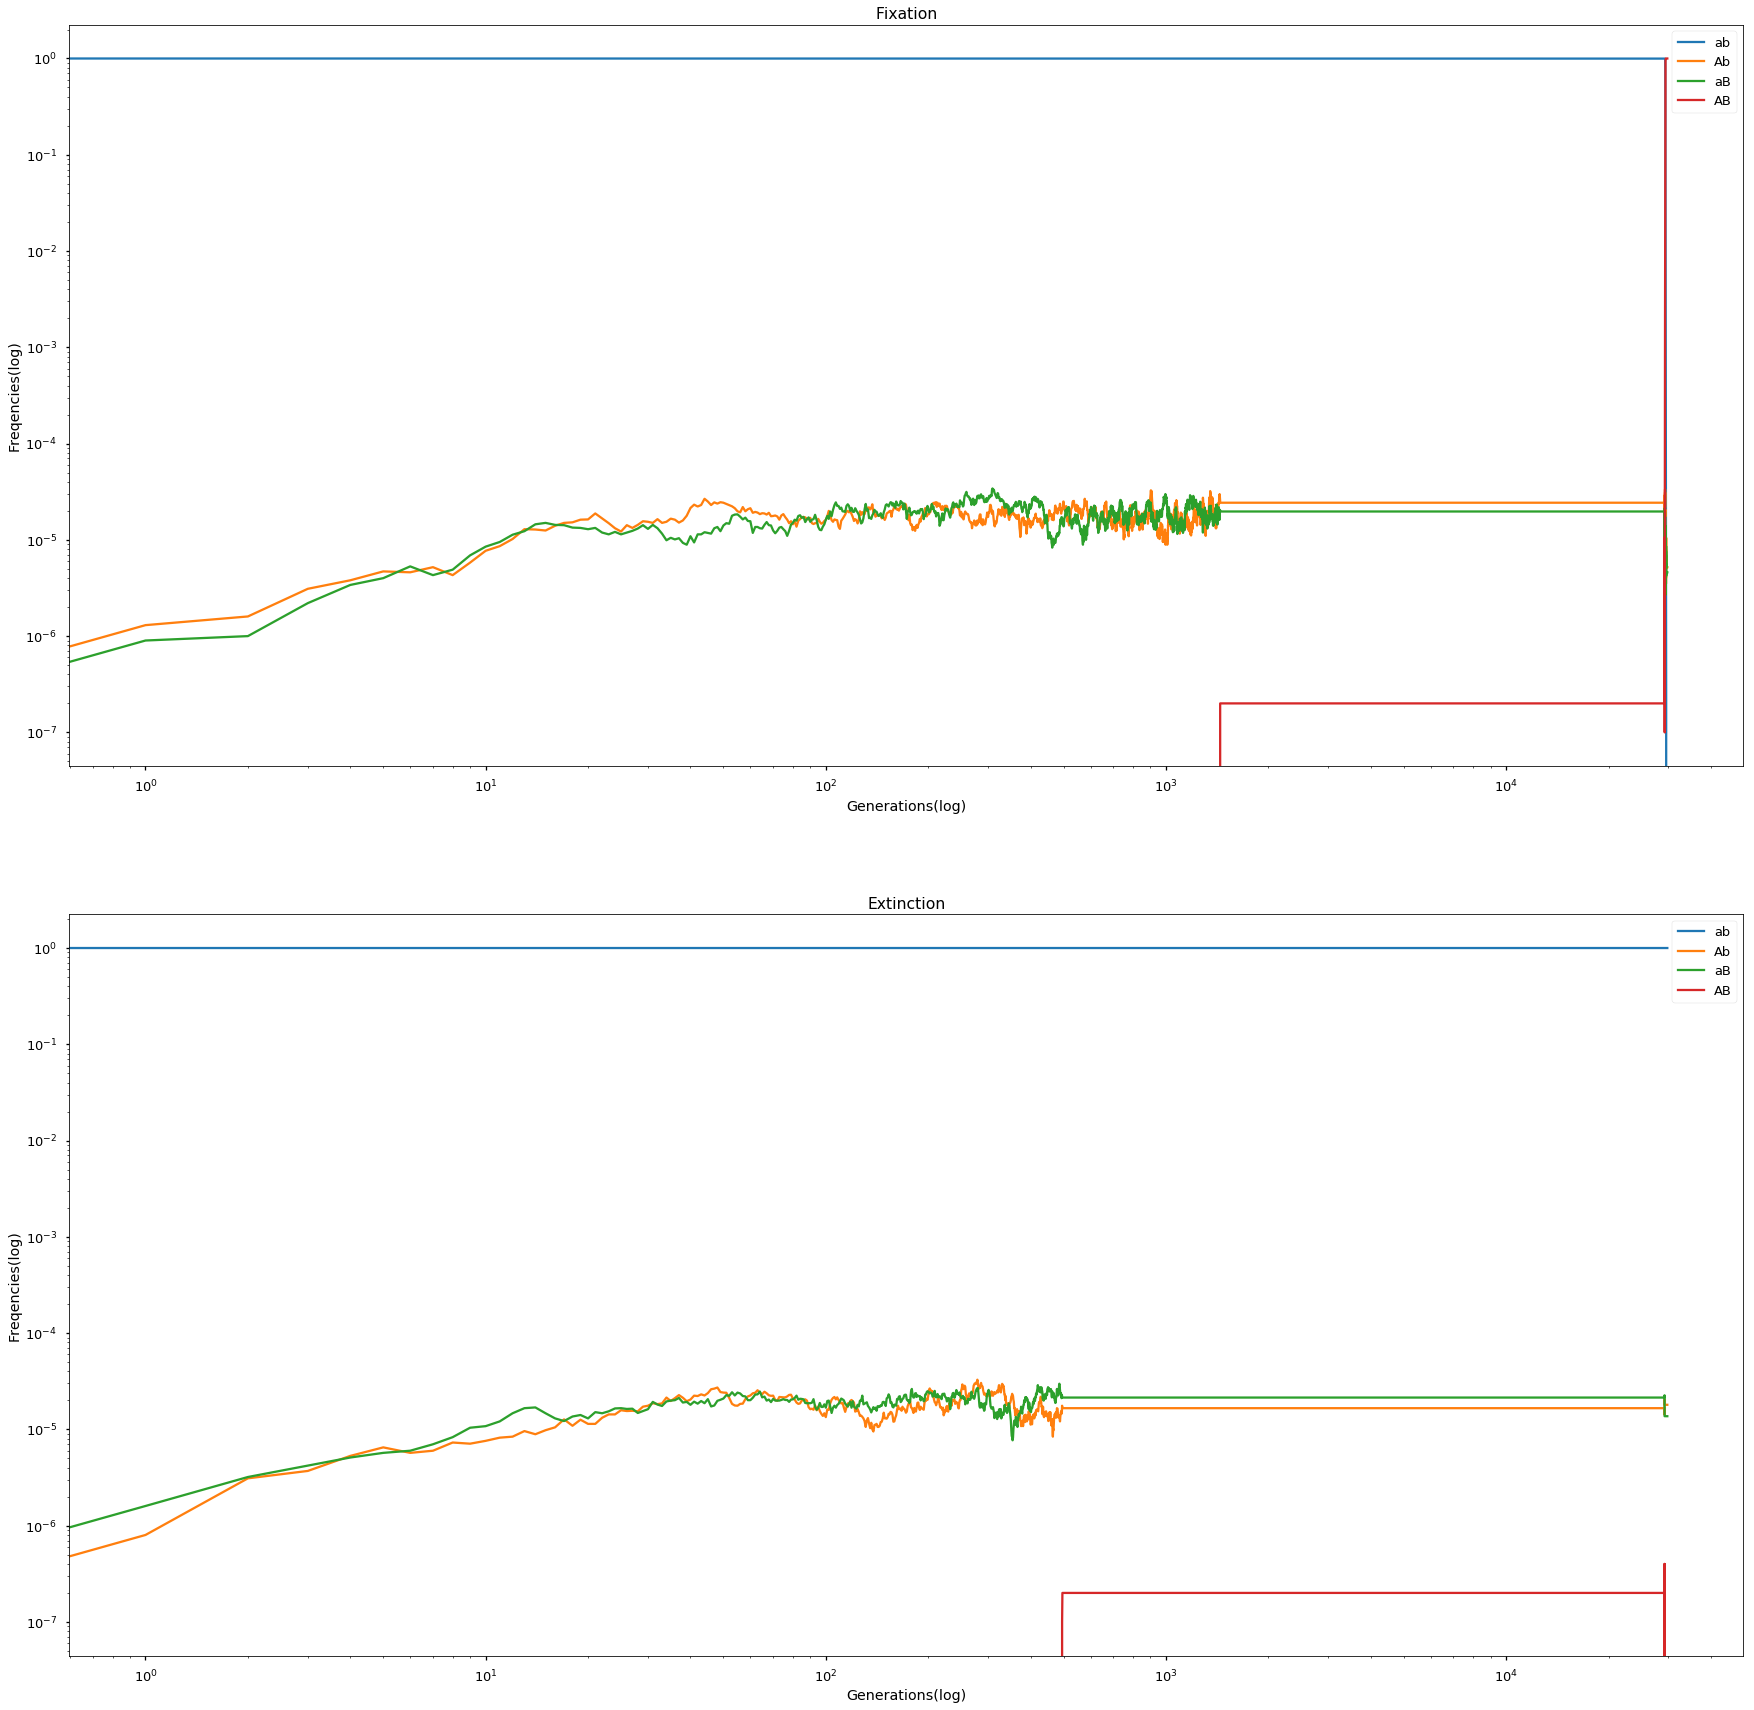

In [142]:
plt.figure(1,figsize=(30,30))
plt.subplot(211)
plt.plot(fixations[:,0,0],label="ab")
plt.plot(fixations[:,1,0],label="Ab")
plt.plot(fixations[:,2,0],label="aB")
plt.plot(fixations[:,3,0],label="AB")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Generations(log)")
plt.ylabel("Freqencies(log)")
plt.title('Fixation')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.subplot(212)
plt.plot(extinctions[:,0,0],label="ab")
plt.plot(extinctions[:,1,0],label="Ab")
plt.plot(extinctions[:,2,0],label="aB")
plt.plot(extinctions[:,3,0],label="AB")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Generations(log)")
plt.ylabel("Freqencies(log)")
plt.title('Extinction')
plt.legend()

plt.show()

In [138]:
print("Fixation Probability: {}".format(fixations.shape[2]/frequencies.shape[2]))

Fixation Probability: 0.246


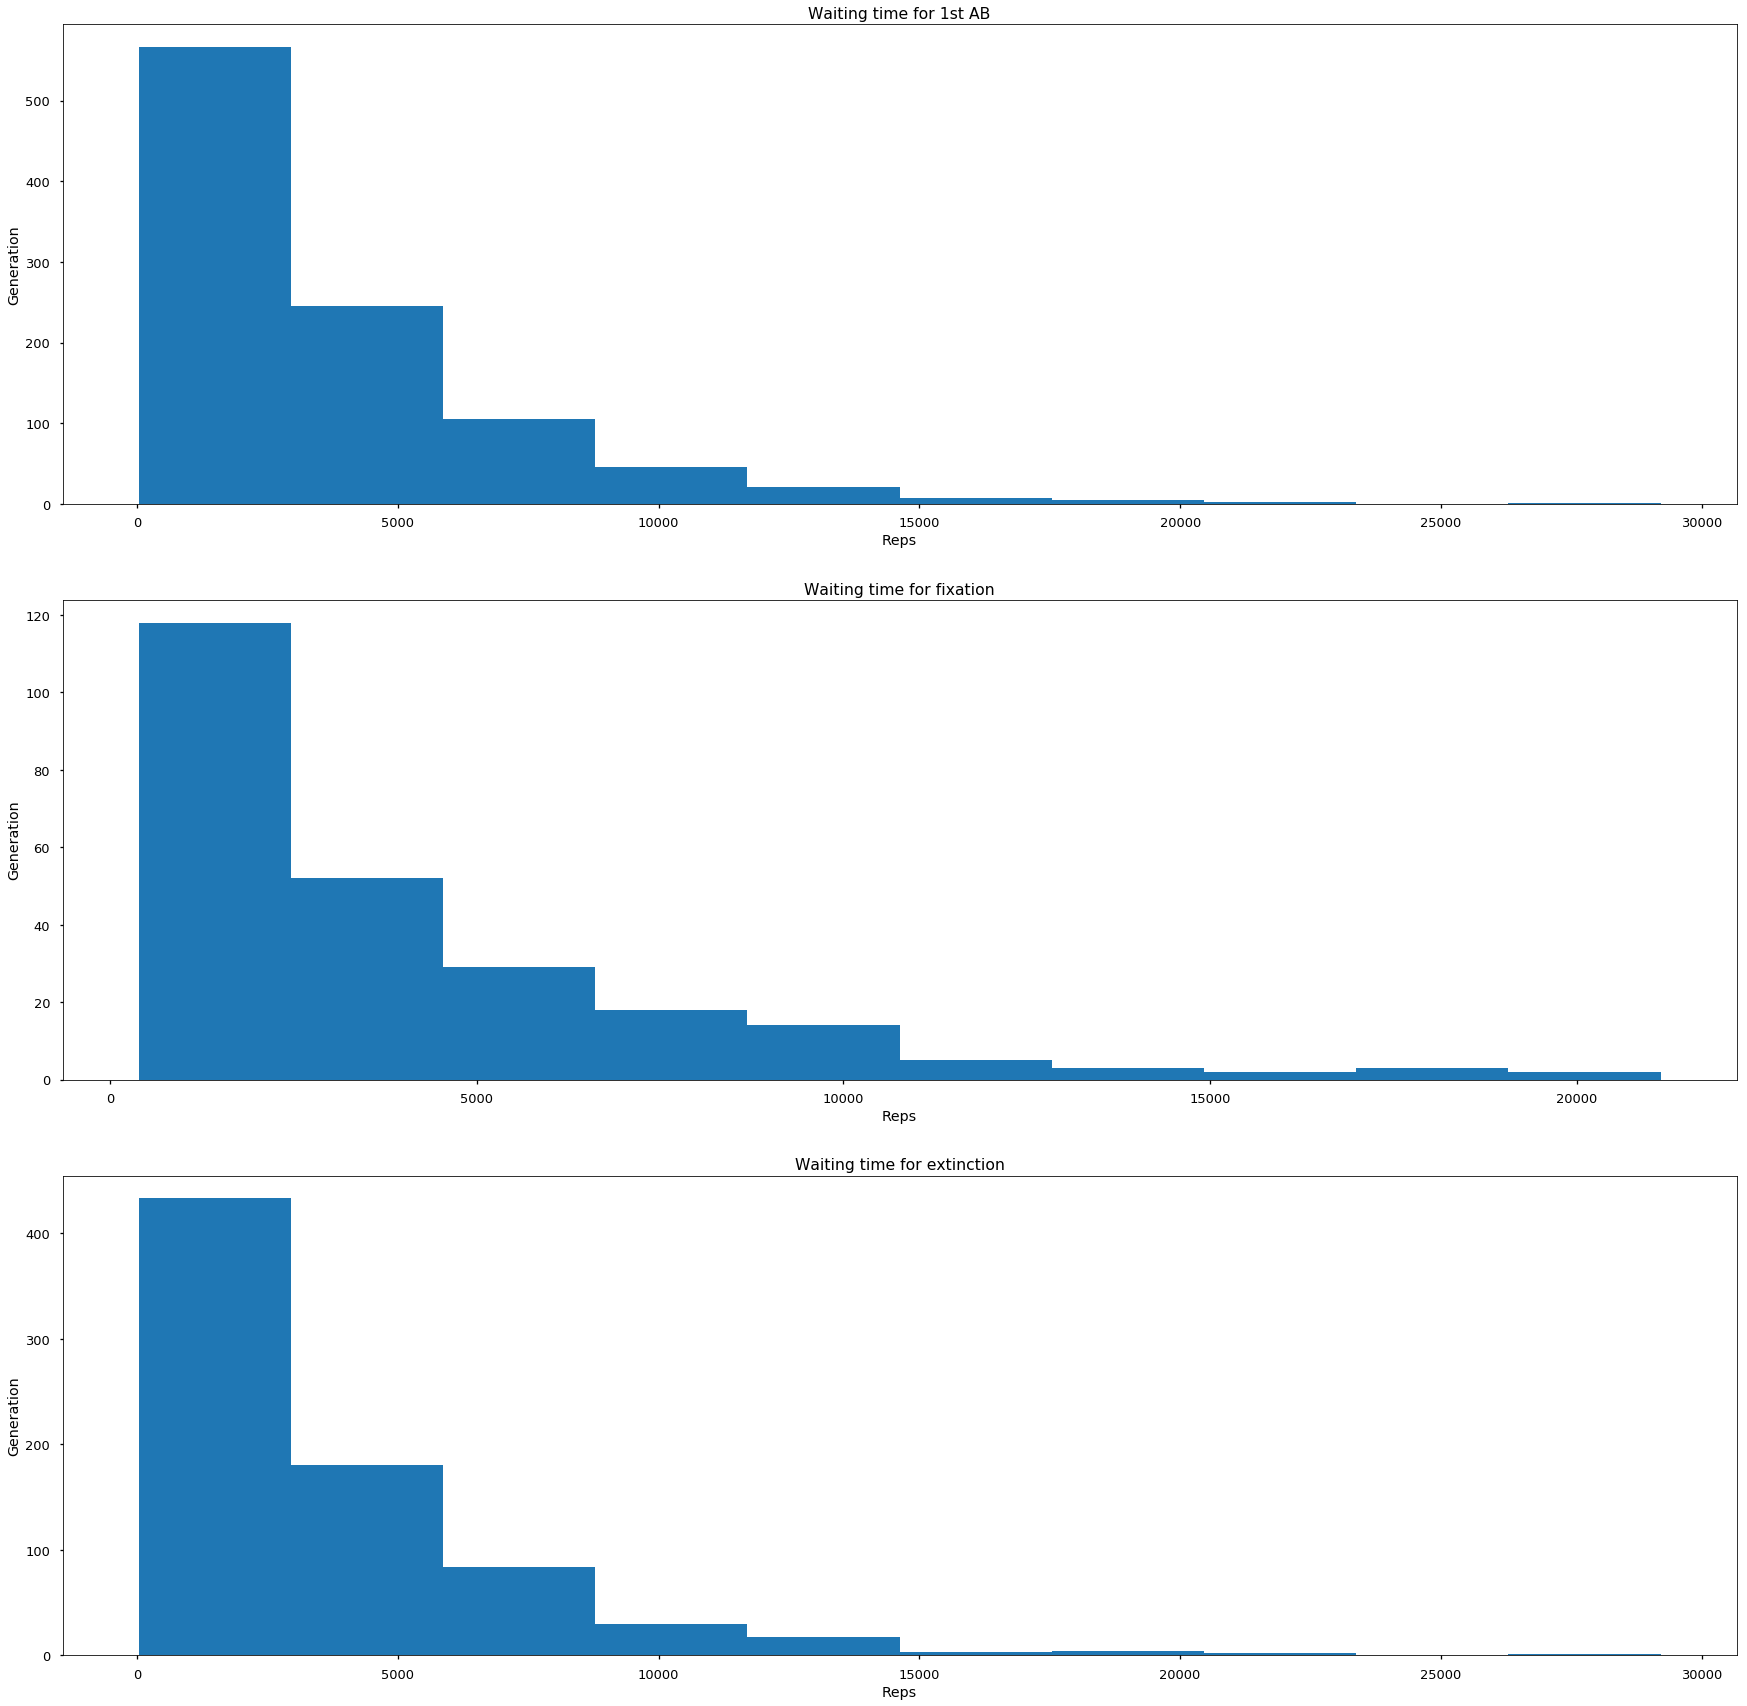

In [141]:
plt.figure(1,figsize=(30,30))
plt.subplot(311)
plt.hist(first_double)
plt.xlabel("Reps")
plt.ylabel("Generation")
plt.title("Waiting time for 1st AB")


plt.subplot(312)
plt.hist(fixation_time)
plt.xlabel("Reps")
plt.ylabel("Generation")
plt.title("Waiting time for fixation")

plt.subplot(313)
plt.hist(extinction_time)
plt.xlabel("Reps")
plt.ylabel("Generation")
plt.title("Waiting time for extinction")


plt.show()